In [1]:
import skyflux as sf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%run show_wedge

In [4]:
# Calculate our Q matrix for the parameters
    # bandwidth runs from 125 to 175 MHz in 1 MHz increments
# 'angular resolution' is not constrained by the details
    # of the observation but rather by the user's patience
Q = calculate_Q(
    B = np.arange(125e6, 175e6 + 0.001, 1e6),
    angular_resolution=250,
    quiet=True
)

Establishing integration parameters


In [5]:
Qi = np.linalg.inv(Q)
# Ridhima suggests that off-diagonal terms are harmful
Qid = diag(Qi)

Minimum: 3.1308641090899476
PTP: 11.952819845997578


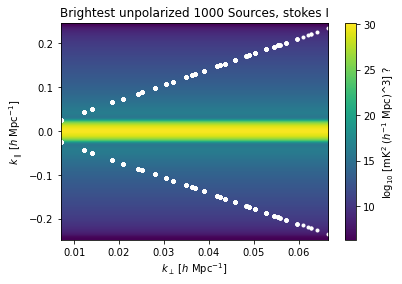

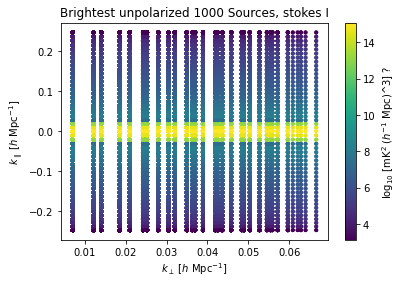

Minimum: 2.469036150076344
PTP: 11.95230511896048


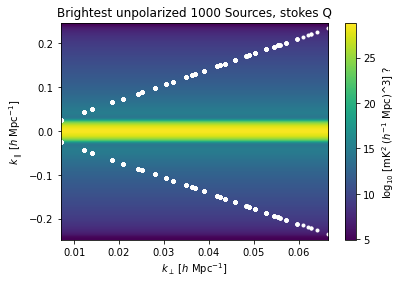

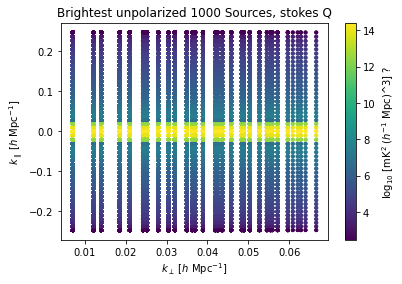

Minimum: 0.8143870830140159
PTP: 11.952543615428347


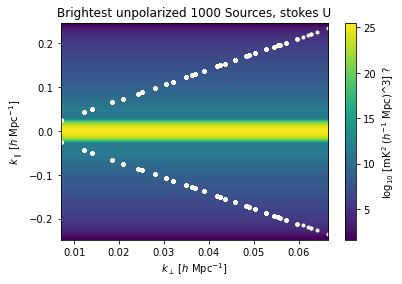

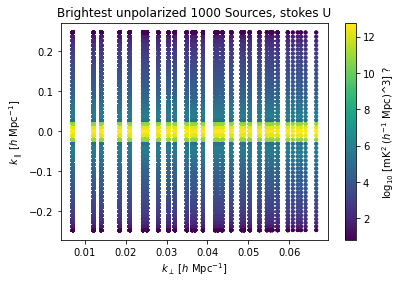

Minimum: 0.6328958559355091
PTP: 11.952529206642746


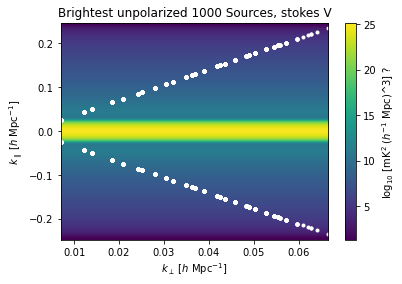

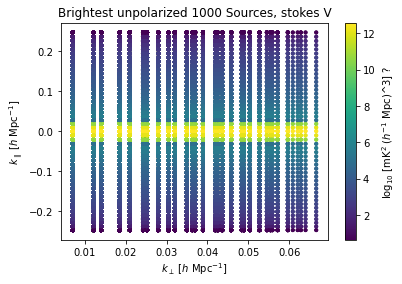

In [9]:
# First, let's look at the unpolarized results
uptub = "Brightest 1000 sources, polarized, Stokes "
    # unpolarized plot title override, base
u_x, u_y, u_I, u_image = wauto_show(
    "HIJKL", sp=0, pt_override=uptub+"I",
    Qi=Qid, quiet=True)
u_x, u_y, u_Q, u_image = wauto_show(
    "HIJKL", sp=1, pt_override=uptub+"Q",
    Qi=Qid, quiet=True)
u_x, u_y, u_U, u_image = wauto_show(
    "HIJKL", sp=2, pt_override=uptub+"U",
    Qi=Qid, quiet=True)
u_x, u_y, u_V, u_image = wauto_show(
    "HIJKL", sp=3, pt_override=uptub+"V",
    Qi=Qid, quiet=True)

In [16]:
# 'x' corresponds to k_perpendicular,
# 'y' to k_parallel
# 'image' is a matrix of pixels for the ranges
    # over the values of 'x' and 'y'
uk = []
urat_I = []

print(len(u_x))
print(len(u_y))
print(u_I.shape)

for xi in range(len(u_x)):
    for yi in range(len(u_y)):
        k_perp = u_x[xi]
        k_par = u_y[yi]
        uk.append(np.sqrt(k_perp ** 2 + k_par ** 2))
        
        prop_I = 10 ** u_I[xi][yi]
        prop_Q = 10 ** u_Q[xi][yi]
        prop_U = 10 ** u_U[xi][yi]
        prop_V = 10 ** u_V[xi][yi]
        rats = np.array([prop_Q, prop_U, prop_V])
        urat_I.append(rats / prop_I)
        
uk = np.array(uk)
urat_I = np.array(urat_I)

135252
135252
(135252, 3)


IndexError: index 3 is out of bounds for axis 0 with size 3

NameError: name 'uk' is not defined

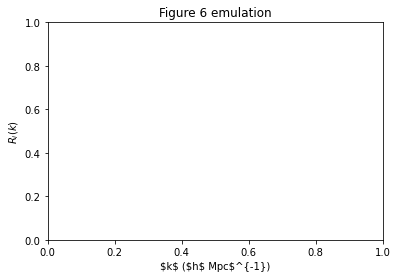

In [12]:
# Now we have prepared the k data and we just want
# to represent them

plt.xlabel(r"$k$ ($h$ Mpc$^{-1})")
plt.ylabel(r"$R_i (k)$")
plt.title("Figure 6 emulation")
plt.plot(uk, np.log10(urat_I))
plt.show()

Minimum: 3.1308641090899476
PTP: 11.952819845997578


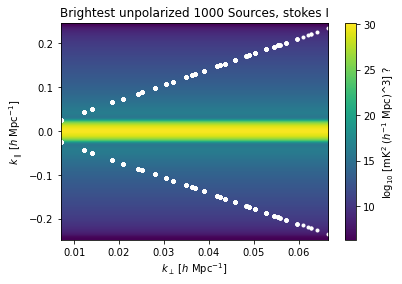

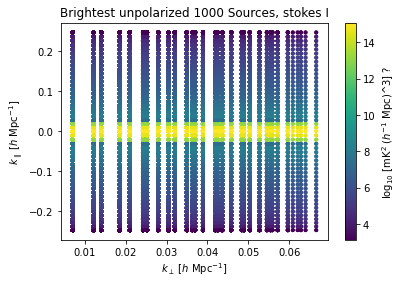

Minimum: 2.469036150076344
PTP: 11.95230511896048


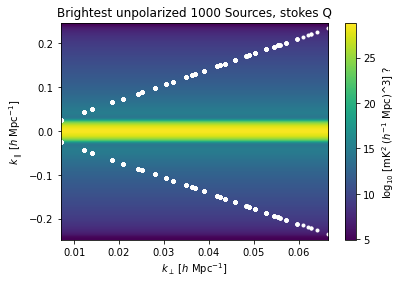

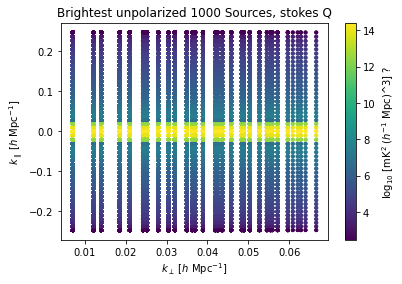

Minimum: 0.8143870830140159
PTP: 11.952543615428347


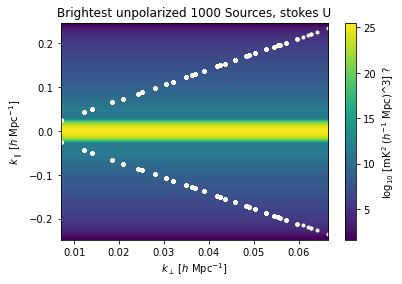

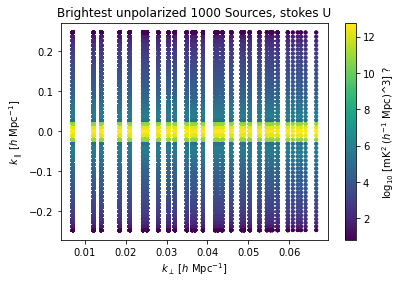

Minimum: 0.6328958559355091
PTP: 11.952529206642746


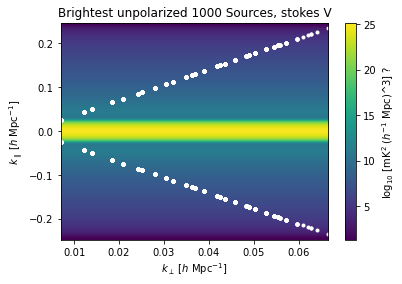

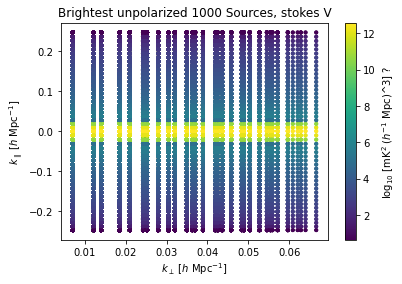

In [11]:
# Next, let's look at the polarized results
pptub = "Brightest 300 Sources, polarized, Stokes "
    # unpolarized plot title override, base
p_x, p_y, p_I, p_image = wauto_show(
    "HIJKL", sp=0, pt_override=uptub+"I",
    Qi=Qid, quiet=True)
p_x, p_y, p_Q, p_image = wauto_show(
    "HIJKL", sp=1, pt_override=uptub+"Q",
    Qi=Qid, quiet=True)
p_x, p_y, p_U, p_image = wauto_show(
    "HIJKL", sp=2, pt_override=uptub+"U",
    Qi=Qid, quiet=True)
p_x, p_y, p_V, p_image = wauto_show(
    "HIJKL", sp=3, pt_override=uptub+"V",
    Qi=Qid, quiet=True)